In [1]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import pandas as pd


In [3]:
def generateRandomMoons(i):
  random.seed(i)
  # n_moons = random.randint(2, 10)
  n_samples = random.randint(100, 300)
  noise = random.uniform(0, 0.2)
  return make_moons(n_samples=n_samples, noise=noise, random_state=i) # y_offset_factor=5

In [ ]:
from sklearn.neighbors import NearestNeighbors

def tune_dbscan_eps(X, k=None):
    dim = X.shape[1]
    k = k or (2 * dim)
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, _ = nbrs.kneighbors(X)
    k_dist = np.sort(distances[:, -1])
    eps = float(np.percentile(k_dist, 90))
    return eps

In [73]:

results_df = pd.DataFrame(columns=["ran", "ari_score", "ami_score", "X", "y_pred", "y"])


for i in range(1, 21):
  dbscan = DBSCAN(eps=tune_dbscan_eps(X), min_samples=3)
  X, y = generateRandomMoons(i)
  y_pred = dbscan.fit_predict(X)
  
  ari_score = adjusted_rand_score(y, y_pred)
  ami_score = adjusted_mutual_info_score(y, y_pred)

  # print(f"Adjusted Rand Index: {ari_score:.3f}")
  # print(f"Adjusted Mutual Information: {ami_score:.3f}")
  
  new_row_data = {
      "ran": i,
      "ari_score": ari_score,
      "ami_score": ami_score
      
  }
  results_df.loc[len(results_df)] = [i, ari_score, ami_score, X, y_pred, y]

  
  # plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap="viridis")
  # plt.show()
  
  # plt.scatter(X[:,0], X[:,1], c=y_pred, s=10, cmap="viridis")
  # plt.show()
  


In [74]:
results_df

,ran,ari_score,ami_score,X,y_pred,y
0,1,0.301260,0.458767,"[[-0.5063929964960625, 0.9092283590155651], [-...","[0, 0, 1, 2, 0, 1, -1, 7, 0, -1, 8, 1, 0, 0, 3...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."
1,2,1.000000,1.000000,"[[0.7013004738282002, 0.7231780602464928], [0....","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, ..."
2,3,0.088464,0.311068,"[[-0.9025842950333162, 0.4456240009834489], [1...","[0, 1, 2, -1, 3, 4, 0, 1, 5, 6, 2, 1, 6, 1, 7,...","[0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ..."
3,4,1.000000,1.000000,"[[0.8862733548185902, 0.5207419632961757], [1....","[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...","[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, ..."
4,5,1.000000,1.000000,"[[-1.0325413097200147, 0.29868009215806085], [...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."
5,6,0.052092,0.253365,"[[0.054776312636531675, 0.2649437082184698], [...","[0, 1, 2, -1, -1, 3, 4, 0, 2, 5, 6, 7, 7, -1, ...","[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, ..."
6,7,0.565498,0.496719,"[[0.8157962191354767, -0.5068206205414502], [0...","[0, -1, 0, 0, 0, 0, 0, 1, -1, 0, 1, 0, 0, 0, 1...","[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, ..."
7,8,0.987421,0.975841,"[[0.20753950437868826, -0.054301699716802015],...","[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, ...","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, ..."
8,9,0.460371,0.556881,"[[1.9270536668599203, -0.3141282858066745], [-...","[0, 1, 0, 0, 2, 1, 1, 3, 0, 1, 0, 1, 3, 3, 2, ...","[1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, ..."
9,10,1.000000,1.000000,"[[-0.9130215467417365, 0.4213810456048162], [0...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, ..."


In [75]:
print(f'ari score: {results_df['ari_score'].mean()}, ami score: {results_df['ami_score'].mean()}')

ari score: 0.5728370835158283, ami score: 0.6461838544943949


In [76]:
results_df.loc[results_df['ari_score'].idxmin()]

ran                                                         11
ari_score                                              0.00216
ami_score                                             0.085385
X            [[0.20316613551684803, -0.0716854658732407], [...
y_pred       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
y            [1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...
Name: 10, dtype: object

In [77]:
results_df.loc[results_df['ami_score'].idxmin()]

ran                                                         11
ari_score                                              0.00216
ami_score                                             0.085385
X            [[0.20316613551684803, -0.0716854658732407], [...
y_pred       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
y            [1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...
Name: 10, dtype: object

In [78]:
results_df[results_df['ran'] == 10]

,ran,ari_score,ami_score,X,y_pred,y
9,10,1.0,1.0,"[[-0.9130215467417365, 0.4213810456048162], [0...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, ..."


In [79]:
def generate_scatter(results_df, i):
  ran, ari_score, ami_score, X, y_pred, y = results_df.loc[i-1]
  print('id: {ran}')
  print(f'ari_score: {ari_score}, ami_score: {ami_score}')
  plt.scatter(X[:,0], X[:,1], c=y_pred, s=10, cmap="viridis")
  plt.show()
  
  plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap="viridis")
  plt.show()
  print('-'*20)

id: {ran}
ari_score: 0.0021604213709075625, ami_score: 0.08538529862840692


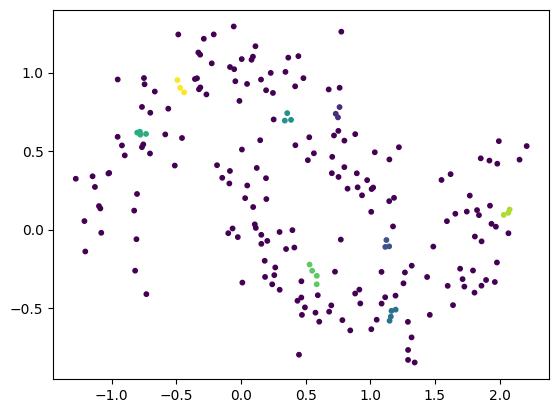

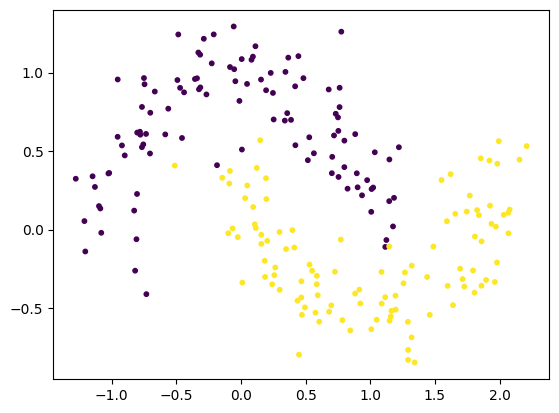

--------------------


In [80]:
generate_scatter(results_df, i=11)

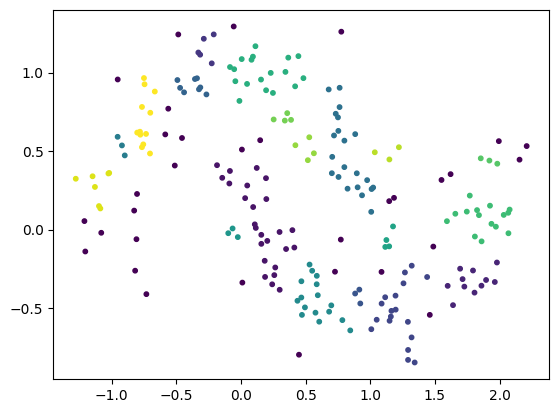

In [ ]:
# X_11 = results_df.loc[10]['X']

# dbscan_fix_11 = DBSCAN(eps=tune_dbscan_eps(X_11, k=2), min_samples=3)
# y_11 = dbscan_fix_11.fit_predict(X_11)

# plt.scatter(X_11[:,0], X_11[:,1], c=y_11, s=10, cmap="viridis")
# plt.show()